In [1]:
# Load necessary libraries
library(ADM)
source("../functions.R")

Loading required package: Matrix


Attaching package: ‘uwot’


The following object is masked from ‘package:umap’:

    umap


Loading required package: MASS

Loading required package: survival


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:igraph’:

    crossing


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The follo

In [2]:
# Set dataset name
dataset = "metabolism"  # Options: Gutierrez, Oihane, Quake, Brain5k, mir, Spleen, metabolism, gene

# Load data
dataload = dataloader(dataset)
dat = dataload$dat
info = dataload$info
k = length(unique(info))
label_mapping <- get_mapping(dataset)
print("load data successfully!")

# Execute candidate visualization methods
candidate.out = candidate.visual(dat, dim = 3, method=c("PCA", "MDS", "iMDS", "Sammon", "HLLE", "Isomap", 
                                                  "kPCA", "LEIM", "UMAP", "tSNE","PHATE","KEF"),tsne.perplexity = c(10, 30))

print("Indivadual methods completed!!")
# Extract results
e<-candidate.out[[1]]  # Visualization results
names_list = candidate.out[[2]]  # List of method names

[1] "load data successfully!"
[1] 1363  489
[1] "PCA calculating..."
[1] "MDS calculating..."
[1] "iMDS calculating..."
initial  value 27.051093 
final  value 27.036042 
converged
[1] "Sammon calculating..."
Initial stress        : 0.36548
stress after   4 iters: 0.30622
[1] "HLLE calculating..."


2024-10-16 20:33:43.547796: Finding nearest neighbors

2024-10-16 20:33:44.331542: Calculating Hessian



'as(<dsCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "generalMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").

2024-10-16 20:33:48.363712: Embedding

Eigenvalues: 3.892466e-02 3.187211e-02 1.916343e-02 4.175669e-16

2024-10-16 20:33:48.507117: DONE



[1] "Isomap calculating..."


2024-10-16 20:33:48.530887: Isomap START

2024-10-16 20:33:48.534151: constructing knn graph

2024-10-16 20:33:49.358998: calculating geodesic distances

2024-10-16 20:33:50.380017: Classical Scaling



[1] "kPCA calculating..."


2024-10-16 20:33:50.435039: Calculating kernel PCA

2024-10-16 20:33:52.595962: Trying to calculate reverse

2024-10-16 20:33:58.340024: DONE



[1] "kPCA calculating..."


2024-10-16 20:33:58.350979: Calculating kernel PCA

2024-10-16 20:34:00.261756: Trying to calculate reverse

2024-10-16 20:34:05.708472: DONE



[1] "LEIM calculating..."


2024-10-16 20:34:05.720017: Creating weight matrix

2024-10-16 20:34:06.613142: Eigenvalue decomposition

Eigenvalues:  3.147964e-01  2.487837e-01  1.885247e-01 -2.597681e-17

2024-10-16 20:34:06.806528: DONE



[1] "UMAP calculating..."
[1] "UMAP calculating..."
[1] "tSNE calculating..."
[1] "tSNE calculating..."
[1] "PHATE calculating..."
[1] "PHATE calculating..."
[1] "KEF calculating..."
NULL
[1] "Indivadual methods completed!!"


In [3]:
# set.seed(2024)
# Execute meta-spec visualization
ensemble.out = ensemble.viz(e, names(e))
print("meta-spec completed!!")

[1] "1000 samples done!"
[1] "meta-spec completed!!"


In [4]:
# Execute ADM method
adm.out = adm(e,distr.template = "combine")
print("ADM completed!!")

[1] "working on ADM..."


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Buildi

[1] "ADM completed!!"


In [5]:
# Define color list for visualization
color_list =c("#FB6A4A","#54278F","#006635","#3182BD","#DE2D26","#72A34F","#5D7AD3", "#756BB1","#FCAE91","#fe87ac","#AFABAB","#67A9CF","#CBC9E2","#4d982e","#E6873E","#545454","#aa3474","#ee8c7d","#2e5fa1","#FDD0A3","#C22F2F","#036f73")

# Process and visualize meta-method results
result = process_and_visualize_meta_methods(adm.out, ensemble.out,info, k, color_list)

[1] "Running R version:4.3.1"
****** meta-spec ******
        ARI       NMI
1 0.1606259 0.2741714
****** ADM ******
        ARI       NMI
1 0.1792818 0.2905192


In [6]:
result$ARI_list

[[1]]
        ARI       NMI
1 0.1606259 0.2741714

[[2]]
        ARI       NMI
1 0.1792818 0.2905192

[[1]]

[[2]]
NULL

[[3]]


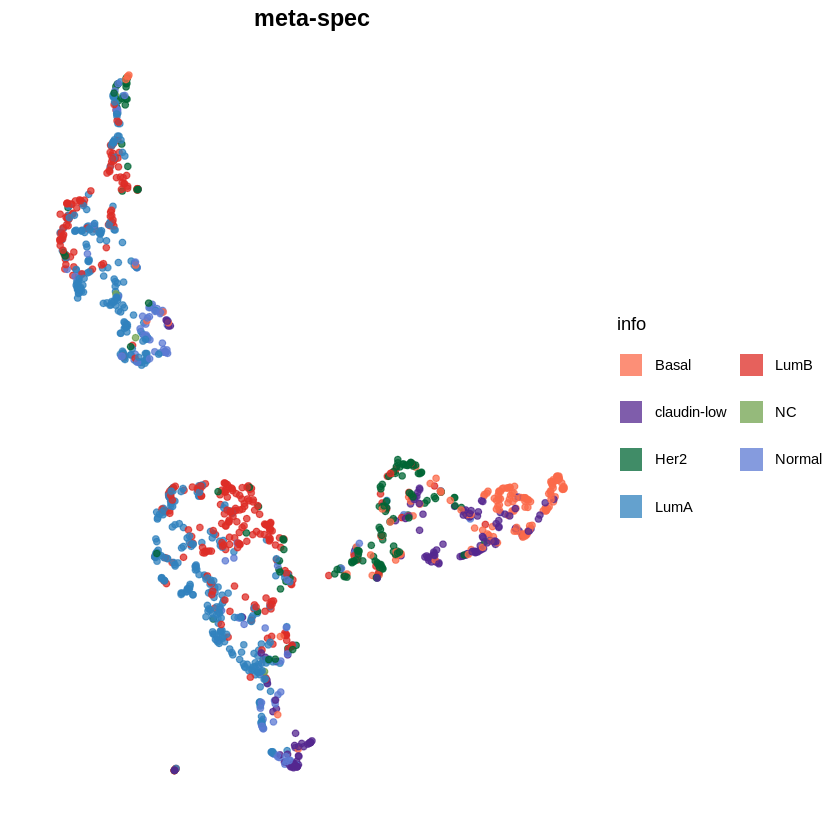

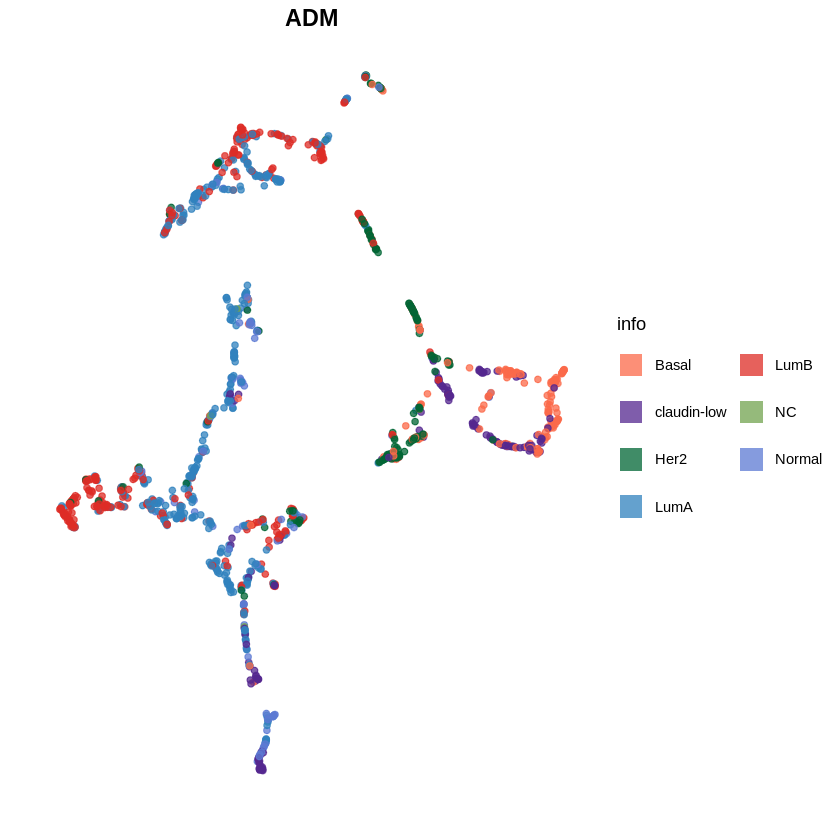

In [7]:
result$plot

****** PCA ******
        ARI       NMI
1 0.1916272 0.2550611
Average Silhouette Width: 0.3387742 

****** MDS ******
        ARI       NMI
1 0.1899166 0.2717208
Average Silhouette Width: 0.2688443 



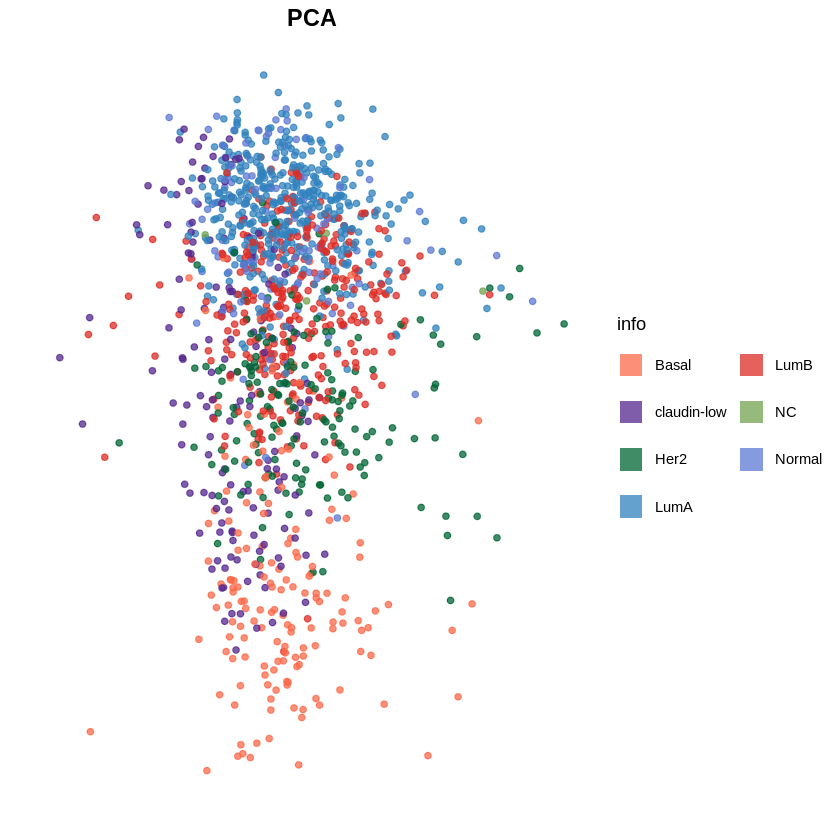

****** iMDS ******
        ARI       NMI
1 0.1899166 0.2717208
Average Silhouette Width: 0.2688453 



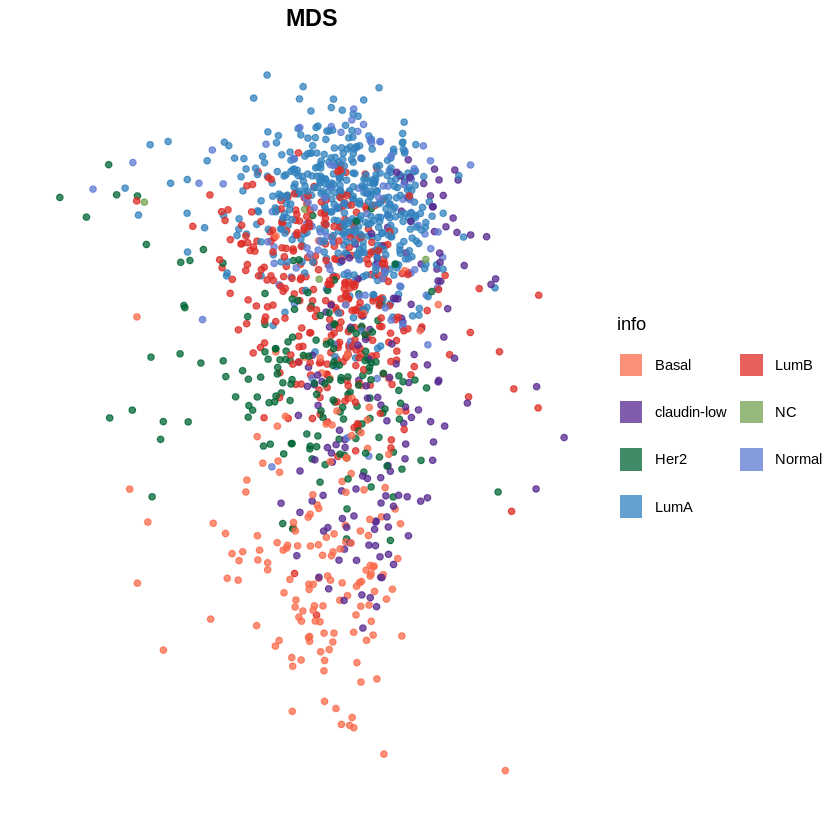

****** Sammon ******
        ARI       NMI
1 0.1543981 0.2453013
Average Silhouette Width: 0.2553279 



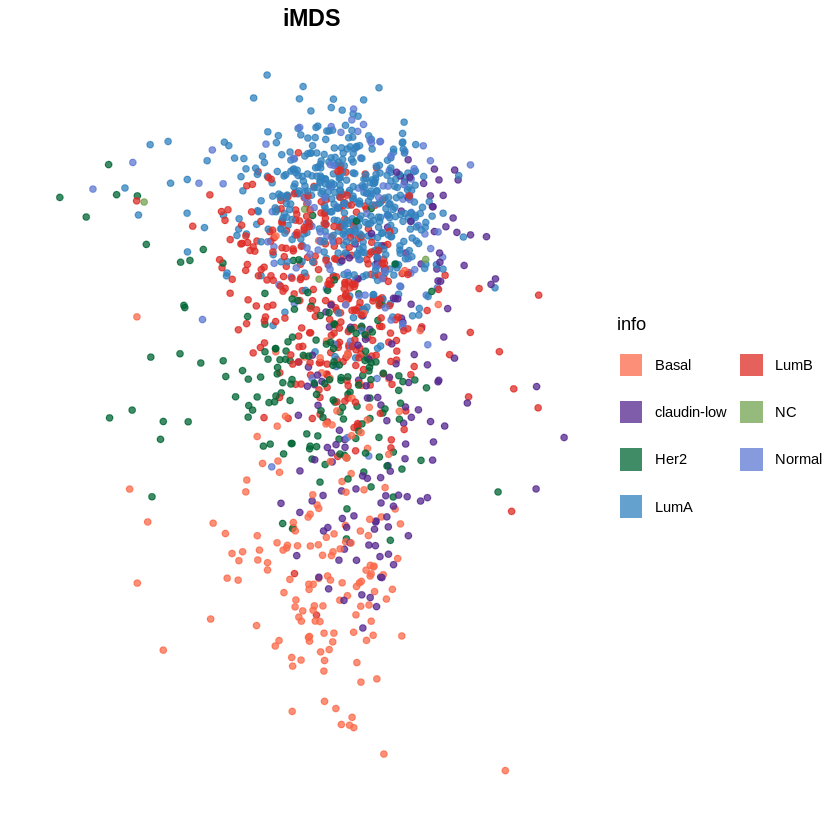

****** HLLE ******
         ARI       NMI
1 0.09276012 0.1113832
Average Silhouette Width: 0.7213606 



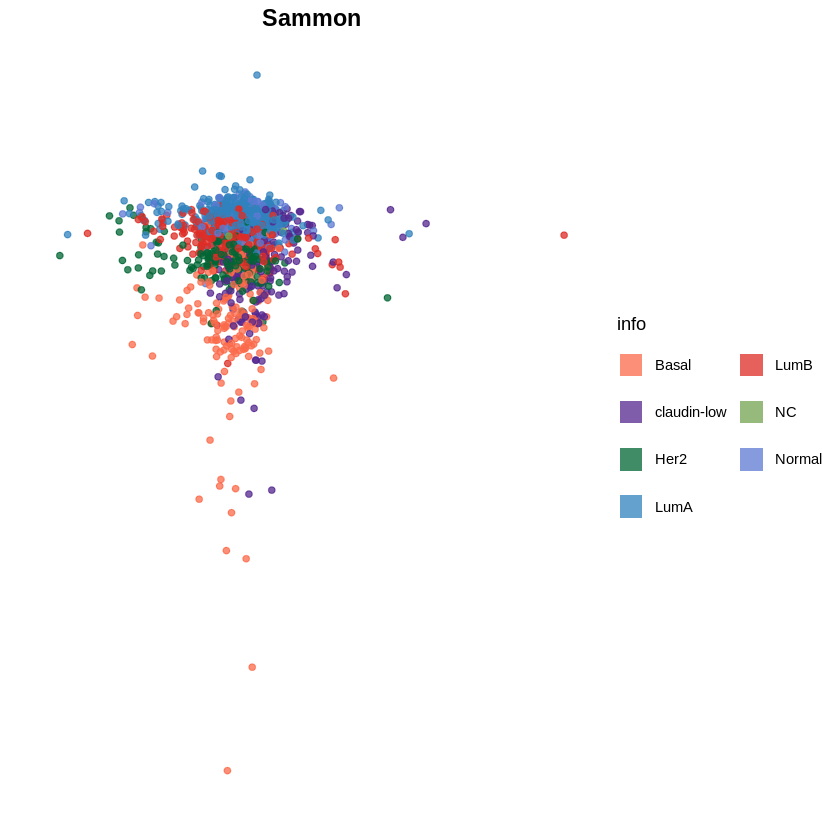

****** Isomap ******
        ARI       NMI
1 0.1856671 0.2669362
Average Silhouette Width: 0.2668716 



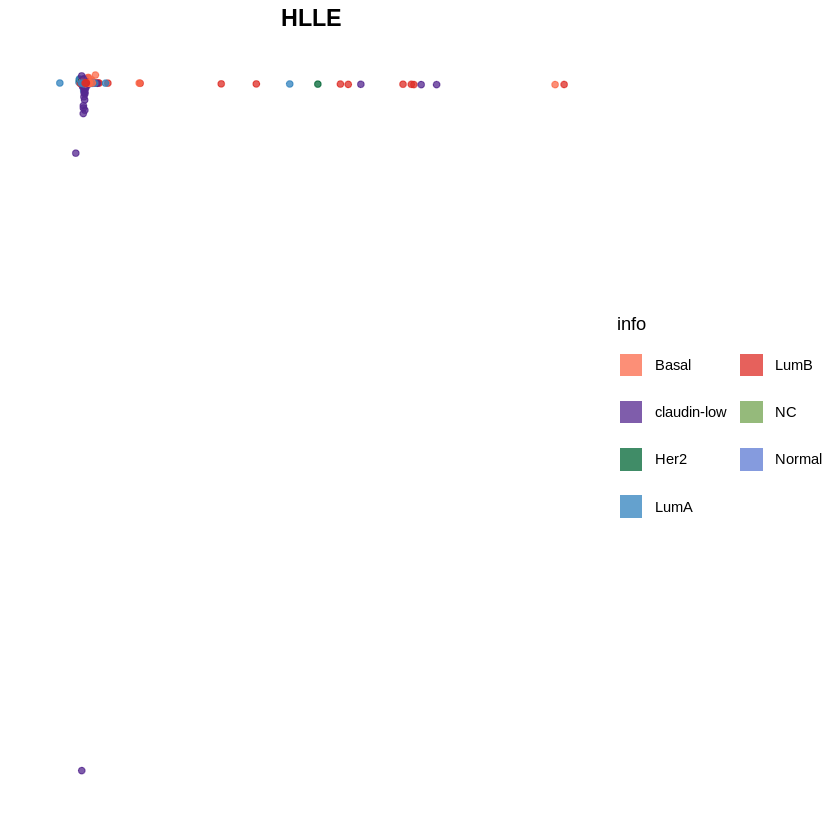

****** kPCA1 ******
        ARI       NMI
1 0.1939332 0.2780547
Average Silhouette Width: 0.2729856 



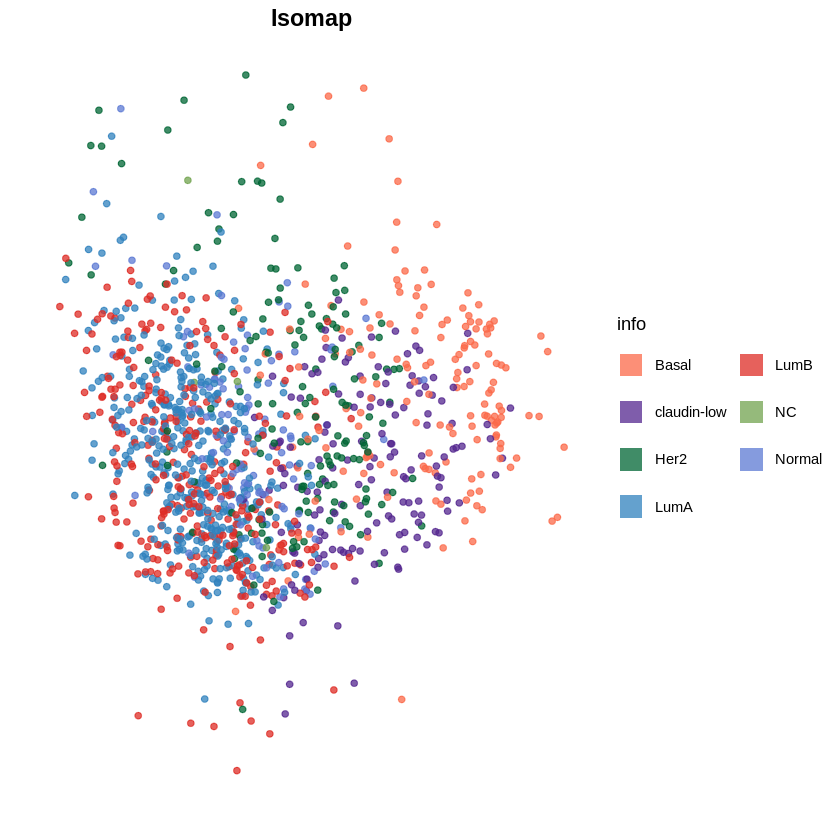

****** kPCA2 ******
        ARI      NMI
1 0.1896692 0.273776
Average Silhouette Width: 0.2822225 



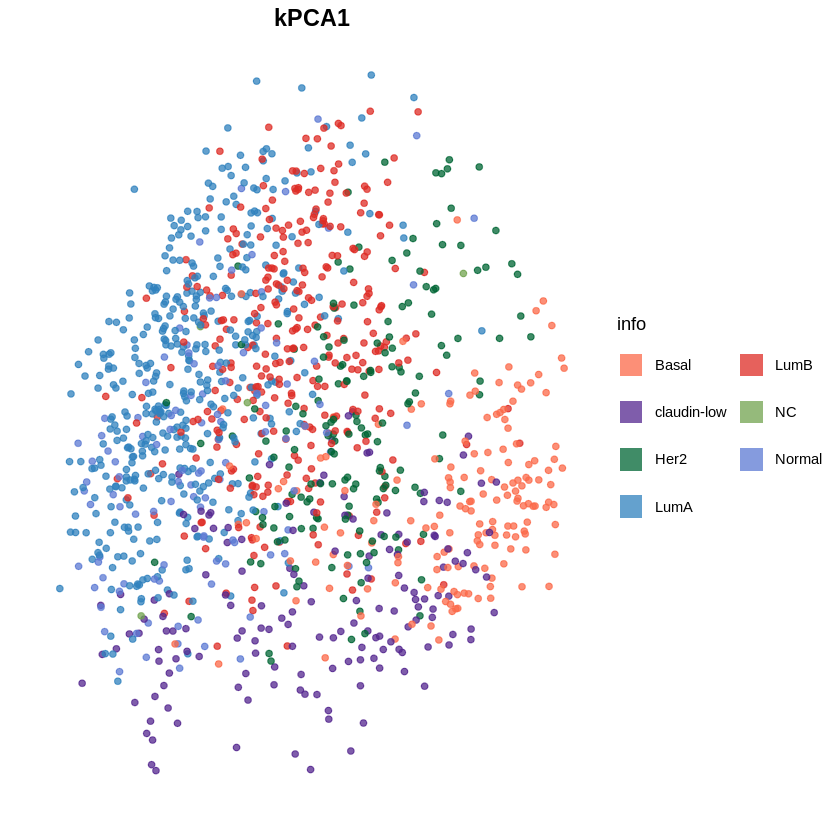

****** LEIM ******
        ARI       NMI
1 0.1509744 0.2374237
Average Silhouette Width: 0.337531 



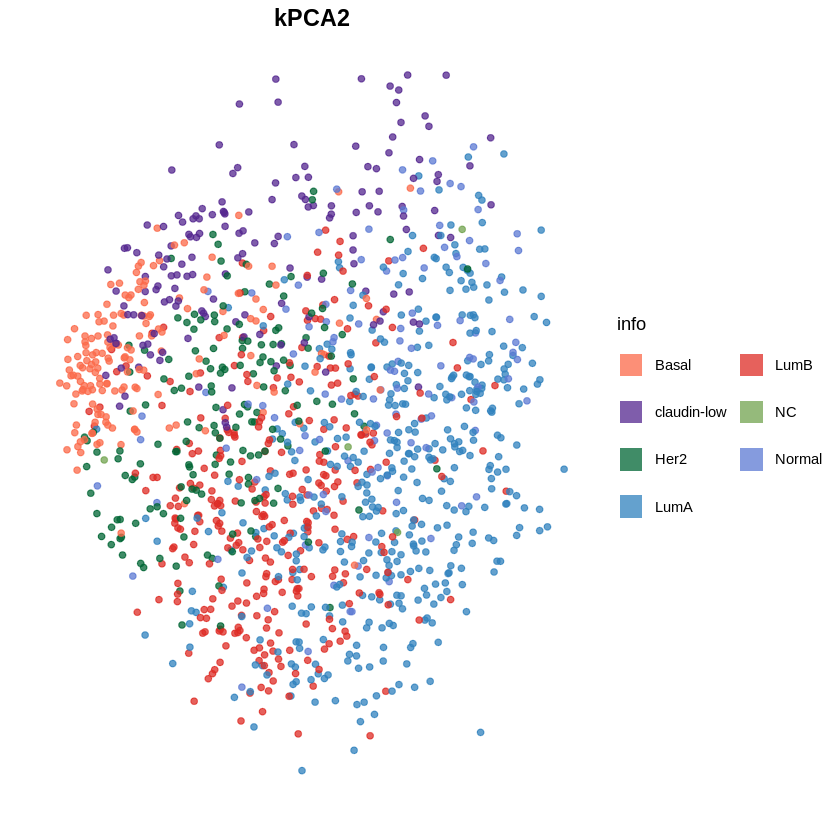

****** UMAP1 ******
        ARI       NMI
1 0.1734129 0.2649632
Average Silhouette Width: 0.3580729 



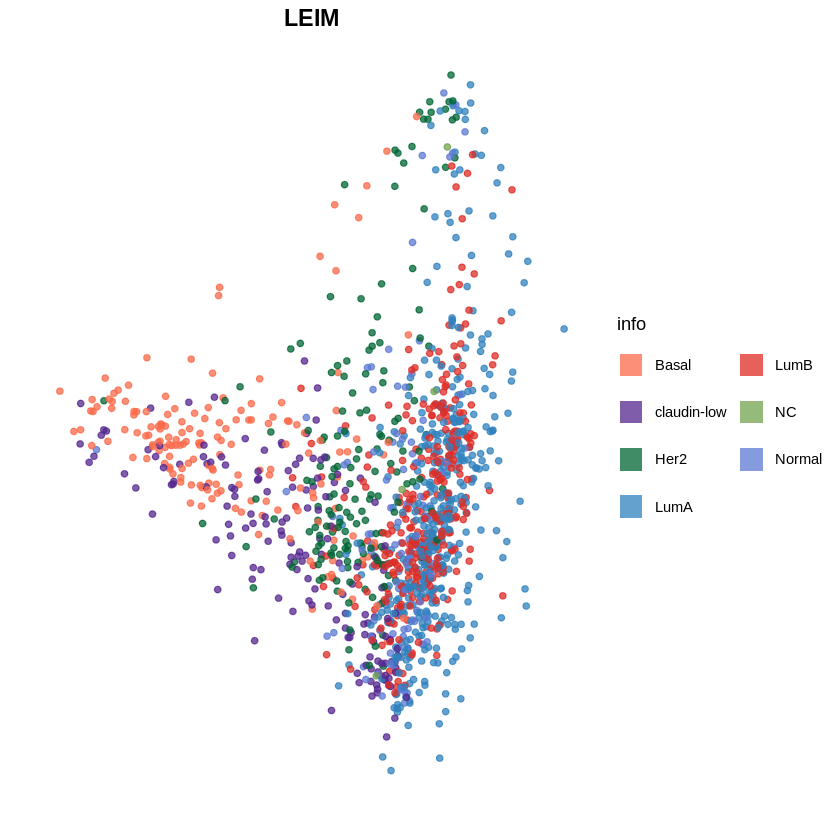

****** UMAP2 ******
        ARI      NMI
1 0.1754471 0.271476
Average Silhouette Width: 0.347345 



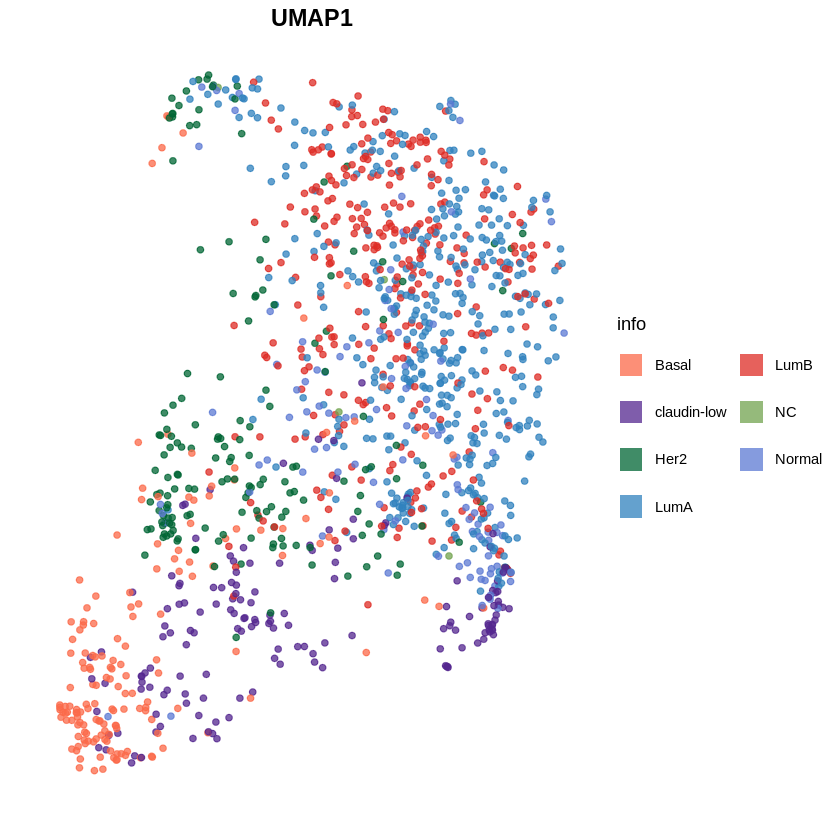

****** tSNE1 ******
        ARI      NMI
1 0.1523522 0.238437
Average Silhouette Width: 0.3225808 



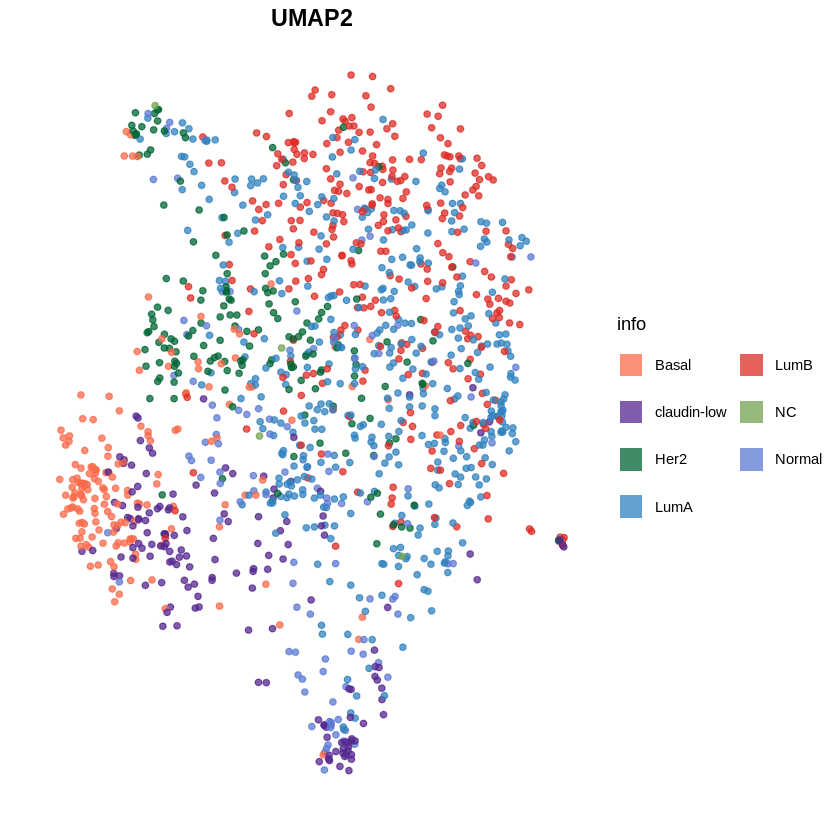

****** tSNE2 ******
        ARI       NMI
1 0.1723762 0.2615849
Average Silhouette Width: 0.317834 



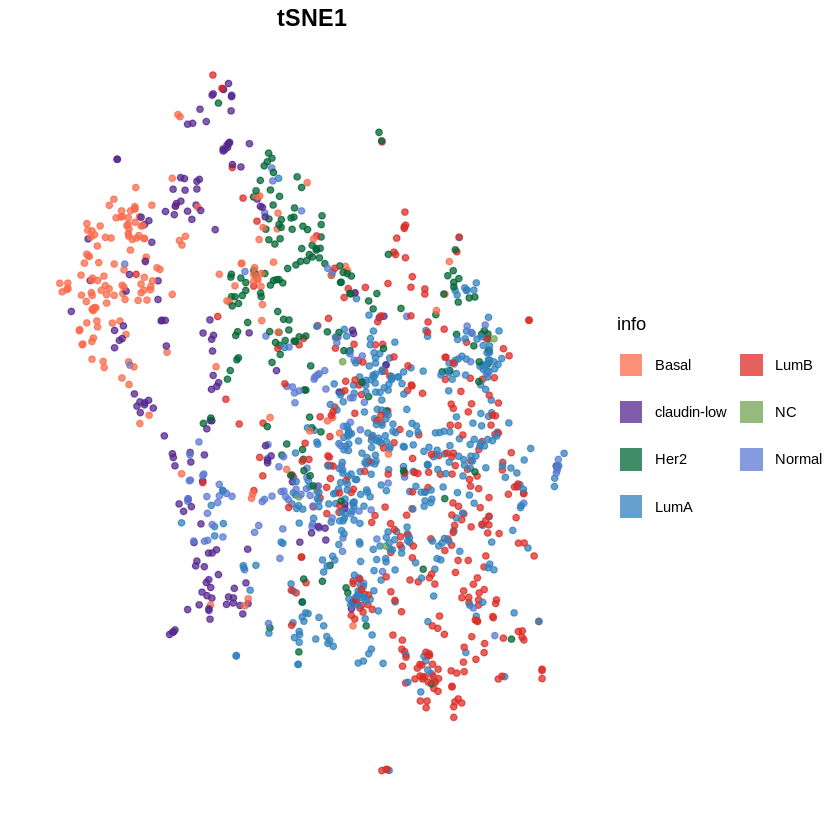

****** PHATE1 ******
        ARI      NMI
1 0.2415315 0.325886
Average Silhouette Width: 0.3758728 



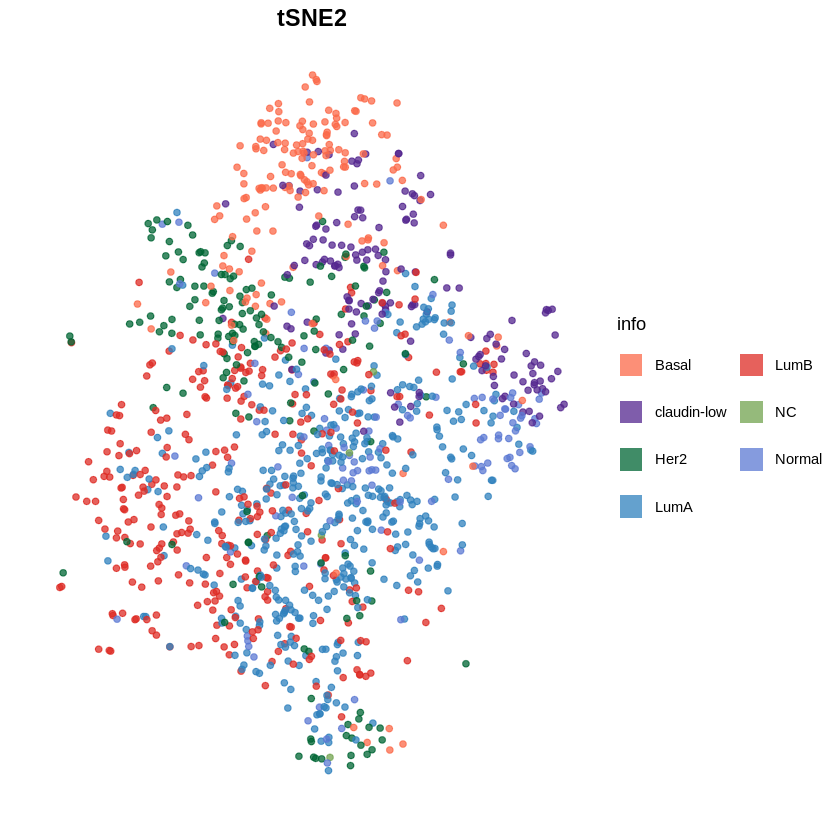

****** PHATE2 ******
       ARI       NMI
1 0.203596 0.2969356
Average Silhouette Width: 0.3629436 



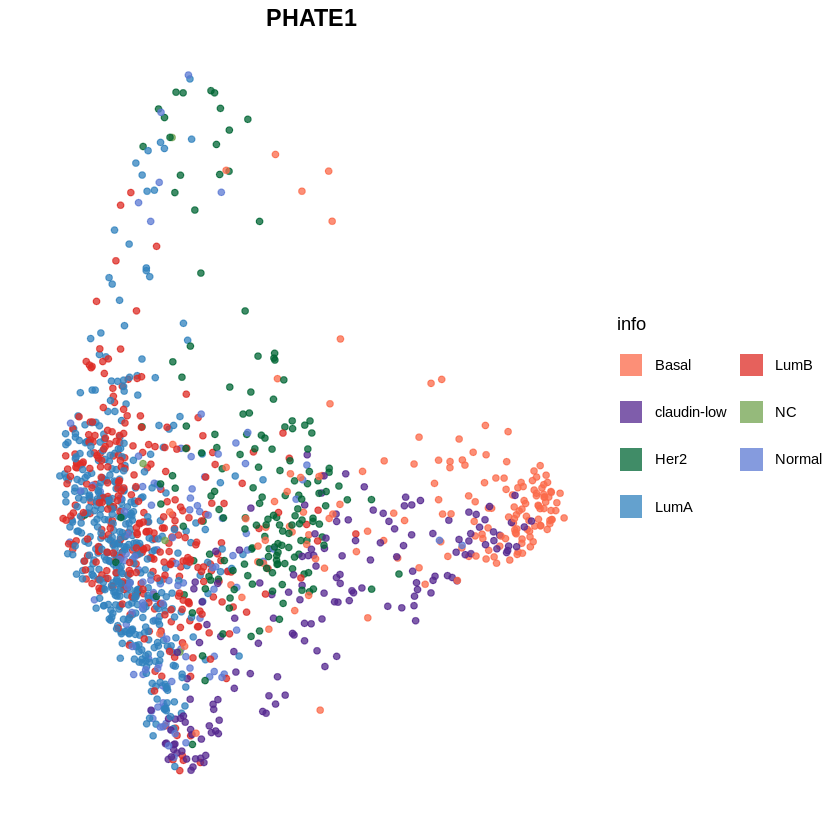

****** KEF ******
        ARI       NMI
1 0.1833839 0.2646421
Average Silhouette Width: 0.3507448 



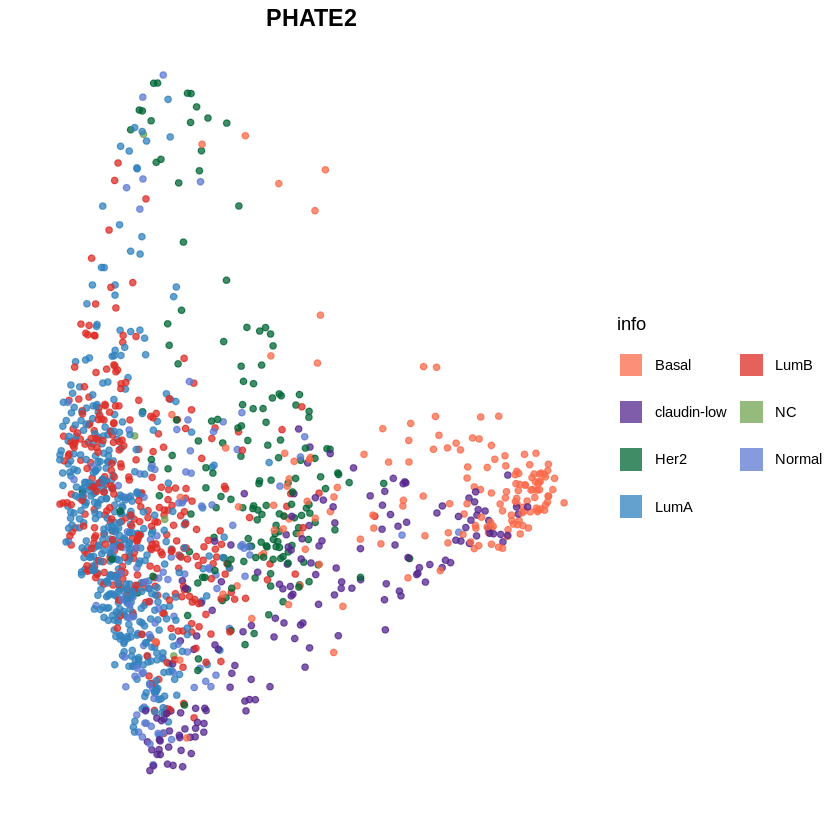

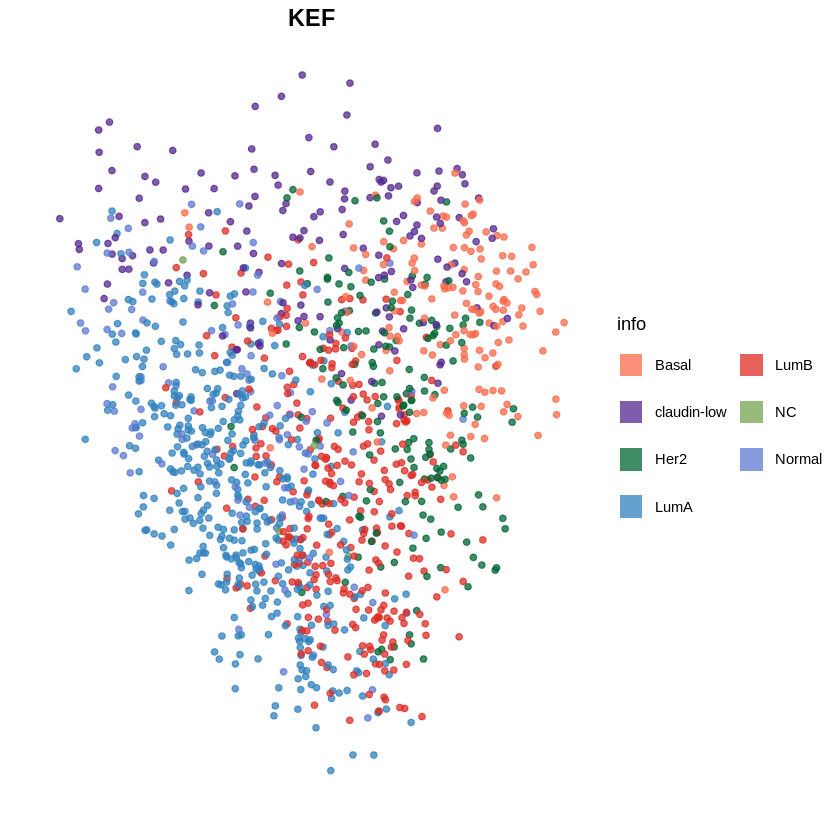

In [8]:
# Visualize individual method results
ind_result = visualize_individual_methods(e, names_list, info, color_list, k)

$plot

$ari
[1] 0.1916272

$nmi
[1] 0.2550611

$silhouette
[1] 0.3387742


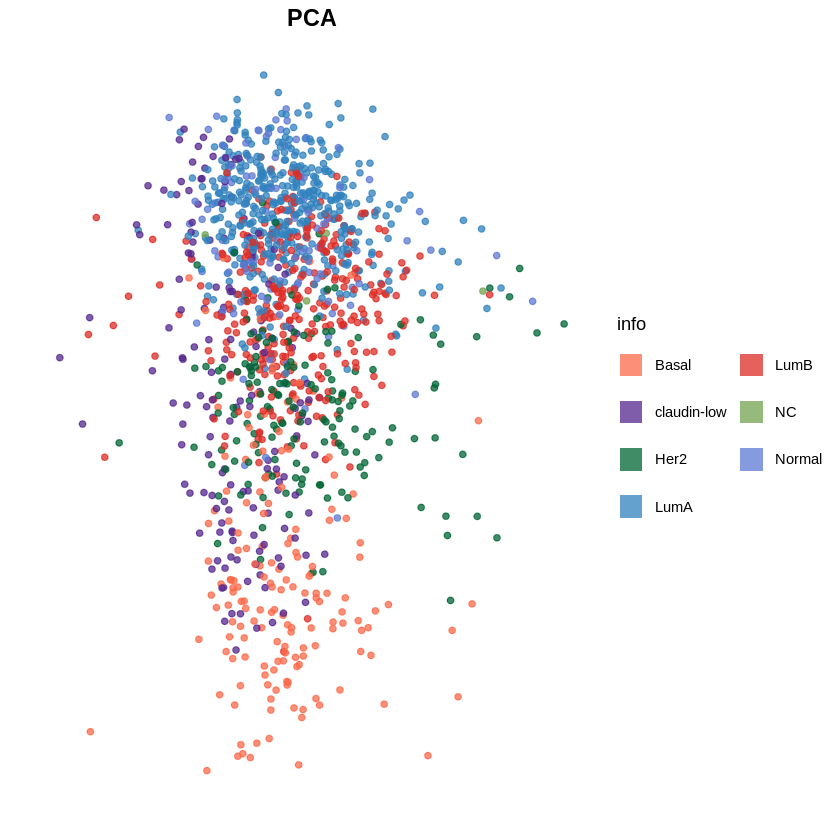

In [9]:
# View results
# Use the following commands to view numerical results and plots for each method:
# ind_result[[1]]$plot  # Plot
# ind_result[[1]]$ari   # ARI value
# ind_result[[1]]$nmi   # NMI value
# ind_result[[1]]$silhouette  # Silhouette coefficient

ind_result[[1]]